# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Question(s) for Analysis
  - How many M/F shwoed and not-showed to their appointment?
  - What is the neighbourhood with highest number of patients going to?
  - Which gender have more scholarship than the other?
  - Which disease have the highest number of patients?
  - Which gender is more committed to attend his appointment?
  - What is the relation between age and shwoing up?
  - Which age interval have the highest number of diseases? 
  - What the relation between SMS_received and Show ?
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling


In [2]:
data= pd.read_csv('Data/noshowappointments-kagglev2-may-2016.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
data.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
97227,5.298795e+13,5766698,F,2016-06-02T15:34:29Z,2016-06-06T00:00:00Z,48,JESUS DE NAZARETH,0,1,0,0,0,0,No
67582,3.466726e+13,5729851,M,2016-05-24T07:54:36Z,2016-05-24T00:00:00Z,2,CENTRO,1,0,0,0,0,0,No
72772,3.228855e+13,5738429,F,2016-05-25T10:57:59Z,2016-05-25T00:00:00Z,14,GRANDE VITÓRIA,1,0,0,0,0,0,Yes
5194,9.166999e+13,5615560,M,2016-04-25T12:40:24Z,2016-05-06T00:00:00Z,5,SANTA MARTHA,0,0,0,0,0,1,No
14419,3.174215e+13,5731743,F,2016-05-24T10:27:31Z,2016-05-30T00:00:00Z,63,BONFIM,0,1,0,0,0,1,No
5483,6.166872e+11,5704267,F,2016-05-16T15:24:04Z,2016-05-30T00:00:00Z,45,ENSEADA DO SUÁ,0,0,0,0,0,1,No
41686,5.148748e+12,5623666,F,2016-04-26T14:25:30Z,2016-05-02T00:00:00Z,90,SÃO JOSÉ,0,1,1,0,1,0,No
82303,5.253433e+11,5674880,M,2016-05-09T12:15:33Z,2016-05-09T00:00:00Z,27,ITARARÉ,0,0,0,0,0,0,No
82712,4.276992e+14,5745337,F,2016-05-30T11:44:08Z,2016-05-30T00:00:00Z,1,SANTO ANDRÉ,0,0,0,0,0,0,No
106070,2.372895e+13,5777278,F,2016-06-06T13:30:31Z,2016-06-07T00:00:00Z,31,MARIA ORTIZ,0,0,0,0,0,0,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
data.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [11]:
data.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### Issues 
 - ScheduledDay and AppointmentDay are objects not datetime
 - misspelling of Hipertension and Handcap
 - misleading column name of No-Show  and values
 - Age values have outliers and wrong values [-1,0,1]
 - Handcap Values are not only 0-1 [2,3,4]


### Data Cleaning
> **in this section I'll solve the issues statted above**

In [12]:
df_clean= data.copy()

#### ScheduledDay and AppointmentDay are objects not datetime
> - converting both to datetime

In [13]:
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay']= pd.to_datetime(df_clean['AppointmentDay'])

In [14]:
df_clean['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [15]:
df_clean['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

#### misspelling of Hipertension and Handcap
> - renaming to Hypertension and Handicap

In [16]:
df_clean.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'},inplace=True)

In [17]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

#### misleading column name of No-Show and values
> - renaming column to Show
> - converting vlaues to {0,1}

In [18]:
df_clean.rename(columns={'No-show':'Show'},inplace=True)

In [19]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Show'],
      dtype='object')

In [20]:
df_clean['Show'].replace({'No':1,'Yes':0},inplace=True)

In [21]:
df_clean['Show']

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: Show, Length: 110527, dtype: int64

#### Age values have outliers and wrong values [-1,0,1]
> - drop the rows containg these values

In [22]:
df_clean= df_clean[df_clean['Age']>1]

In [23]:
(df_clean['Age']<=1).sum()

0

#### Handcap Values are not only 0-1 [2,3,4] 
> - replacing them with 1

In [24]:
df_clean['Handicap'].replace([2,3,4],1,inplace=True)

In [25]:
df_clean['Handicap'].value_counts()

0    102475
1      2239
Name: Handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many M/F shwoed and not-showed to their appointment?)

In [147]:
def plot_grouped__bar_graph (data,legend,title,x_label,y_label,fonts,fig_size):
    data.plot(kind='bar',figsize=fig_size,width=0.7)
    plt.legend(legend)
    plt.title(title, fontsize=fonts[0],fontweight='bold')
    plt.xlabel(x_label,fontsize=fonts[1])
    plt.ylabel(y_label,fontsize=fonts[1]);
    
def plot_stacked_bar_graph (data,xticks_labels,bar_width,legend,colors,title,x_label,y_label,fonts):
    fig, ax = plt.subplots()
    ax.bar(xticks_labels,data[0].values,width=bar_width,label=legend[0],color=colors[0])
    ax.bar(xticks_labels,data[1].values,width=bar_width,label=legend[1],color=colors[1],
           bottom=data[0].values)
    plt.legend()
    plt.title(title,fontsize=fonts[0],fontweight='bold')
    plt.xlabel(x_label,fontsize=fonts[1])
    plt.ylabel(y_label,fontsize=fonts[1]);
    
    
def plot_bar_graph(data,title,x_label,y_label,fonts,fig_size,graph_type,labels=[]):
    plt.figure(figsize=fig_size)
    if graph_type== 'barh':
        plt.barh(data.index,data.values)
    else:
        plt.bar(labels,data)

    plt.title(title,fontsize=fonts[0],fontweight='bold')
    plt.ylabel(y_label,fontsize=fonts[1])
    plt.xlabel(x_label,fontsize=fonts[1]);
    

In [148]:
gender= df_clean.groupby(['Gender','Show']).Show.count().unstack()

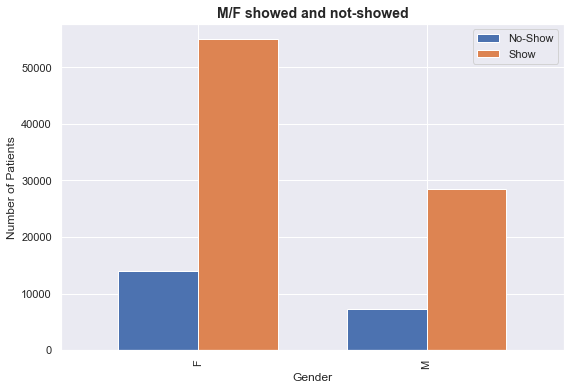

In [149]:
plot_grouped__bar_graph(gender,['No-Show','Show'],'M/F showed and not-showed',
                        'Gender','Number of Patients',[14,12],(9,6))


**From the graph we can see that number of females going to hospitals are more than Males**

### Research Question 2  (What is the neighbourhood with highest number of patients going to?)

In [150]:
hospitals= df_clean.groupby('Neighbourhood').PatientId.count()
hospitals= hospitals[hospitals>200]

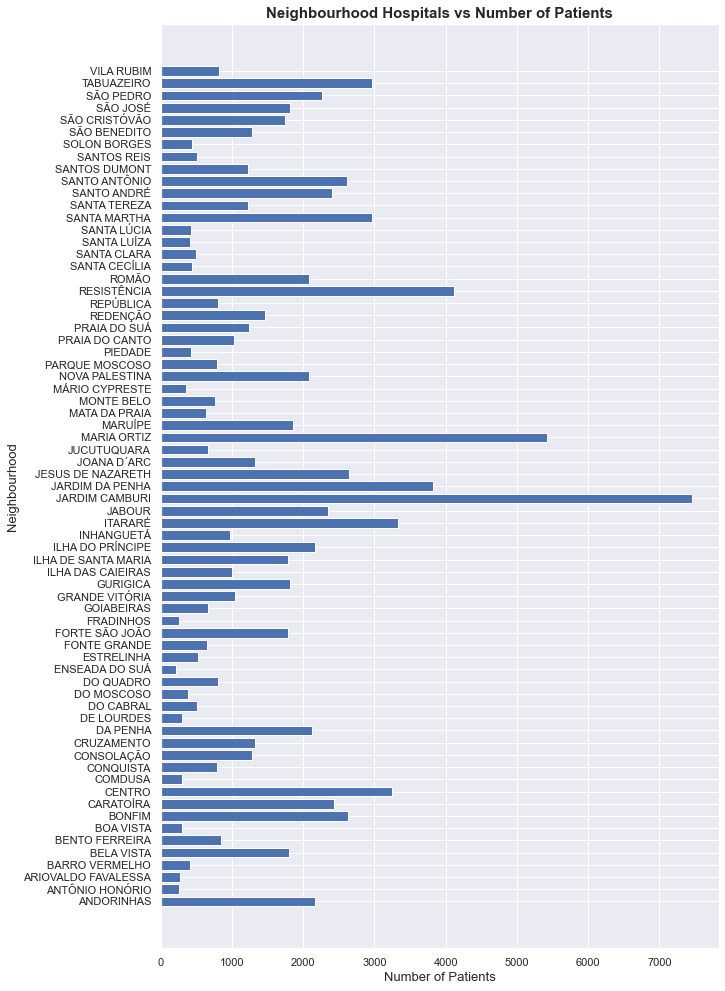

In [151]:
plot_bar_graph(hospitals,'Neighbourhood Hospitals vs Number of Patients',
              'Number of Patients','Neighbourhood',[15,13],(10,17),'barh')


**From the graph we can see that JARDIM CAMBURI is the highest Neighbourhood with Patients going to it's hospitals**

### Research Question 3  (Which gender have more scholarship than the other?)

>**since females number are higher than males so I'll use proportion instead**

In [152]:
df_clean['male_proportion']=df_clean['Gender'].map({'M': 1, 'F': 0})
df_clean['female_proportion']=df_clean['Gender'].map({'M': 0, 'F': 1})
df_clean['male_proportion']=  df_clean['male_proportion'].astype(int)
df_clean['female_proportion']= df_clean['female_proportion'].astype(int)

In [153]:
df_clean['male_proportion']=df_clean['male_proportion'] / 35684
df_clean['female_proportion']= df_clean['female_proportion'] / 69030 

In [154]:
male_scholarship= df_clean[df_clean['Gender']=='M'].groupby(['Scholarship'])['male_proportion'].sum()
female_scholarship= df_clean[df_clean['Gender']=='F'].groupby(['Scholarship'])['female_proportion'].sum()

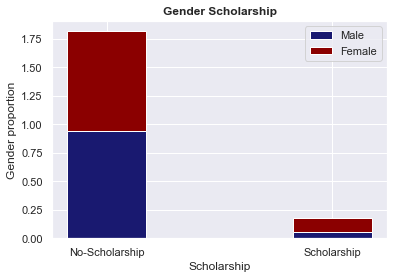

In [171]:
plot_stacked_bar_graph([male_scholarship,female_scholarship],['No-Scholarship','Scholarship'],0.35,['Male','Female'],
                       ['midnightblue','darkred'],'Gender Scholarship','Scholarship','Gender proportion',[12,12])


**from above graph we see that Female have scholarships more than Males**

### Research Question 4 (Which disease have the highest number of patients?)

In [156]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Show',
       'male_proportion', 'female_proportion', 'age_class'],
      dtype='object')

In [157]:
hypertension= df_clean[df_clean['Hypertension']==1].Hypertension.count()
diabetes= df_clean[df_clean['Diabetes']==1].Diabetes.count()
alcoholism= df_clean[df_clean['Alcoholism']==1].Alcoholism.count()
handicap= df_clean[df_clean['Handicap']==1].Handicap.count()
labels=['Hypertension','Diabetes','Alcoholism','Handicap']
disease= [hypertension,diabetes,alcoholism,handicap]

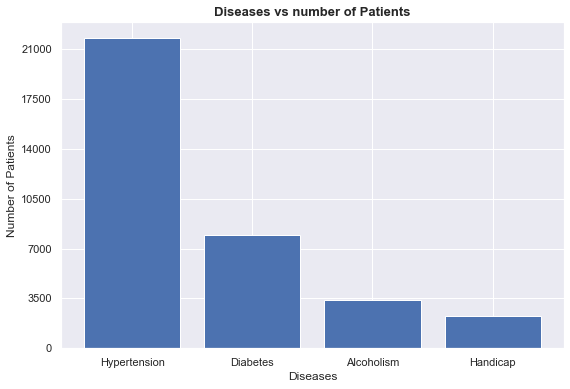

In [158]:
plot_bar_graph(disease,'Diseases vs number of Patients','Diseases','Number of Patients',[13,12],
              (9,6),'bar',labels)

plt.yticks(range(0,22000,3500));


**We can see that Hypertension has the highest number of patients**

### Research Question 5 (Which gender is more committed to attend his appointment?)

In [159]:
male_commitment= df_clean[df_clean['Gender']=='M'].groupby(['Show'])['male_proportion'].sum()
female_commitment= df_clean[df_clean['Gender']=='F'].groupby(['Show'])['female_proportion'].sum()

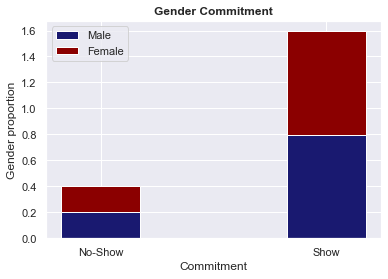

In [160]:
plot_stacked_bar_graph([male_commitment,female_commitment],['No-Show','Show'],0.35,['Male','Female'],
                       ['midnightblue','darkred'],'Gender Commitment','Commitment','Gender proportion',[12,12])


**From the graph we can see that males are more committed to their appointment than females**

### Research Question 6 (What is the relation between age and shwoing up?)
> **making age intervals**

In [161]:
intervals=['[2, 15]','(15.0, 28]','(28, 41]','(41, 54]','(54, 67]', '(67, 80]', '(80, 93]', '(93, 106]', '(106.0, 119.0]']
df_clean['age_class']=pd.cut(df_clean['Age'],bins=range(2,120,13),labels=intervals,include_lowest=True)


In [162]:
df_clean['age_class'].unique()

['(54, 67]', '[2, 15]', '(67, 80]', '(15.0, 28]', '(28, 41]', '(41, 54]', '(80, 93]', '(93, 106]', '(106.0, 119.0]']
Categories (9, object): ['[2, 15]' < '(15.0, 28]' < '(28, 41]' < '(41, 54]' ... '(67, 80]' < '(80, 93]' < '(93, 106]' < '(106.0, 119.0]']

In [163]:
age_commitment= df_clean.groupby(['age_class','Show']).Show.count().unstack()


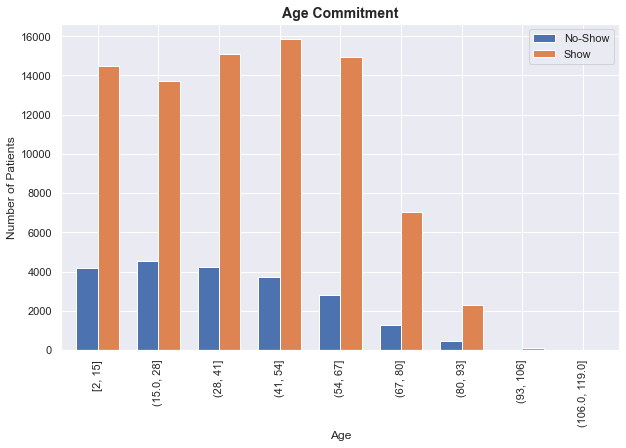

In [164]:
plot_grouped__bar_graph(age_commitment,['No-Show','Show'],'Age Commitment',
                       'Age','Number of Patients',[14,12],(10,6))

**we can see that patients of age 42 to 54 are more committed to show to their appointment**

### Research Question 7 (Which age interval have the highest number of diseases?)

In [165]:
hypertension= df_clean.query('Hypertension==1').groupby(['age_class'])['Hypertension'].count()
diabetes= df_clean.query('Diabetes==1').groupby(['age_class'])['Diabetes'].count()
alcoholism= df_clean.query('Alcoholism==1').groupby(['age_class'])['Alcoholism'].count()
handicap= df_clean.query('Handicap==1').groupby(['age_class'])['Handicap'].count()

In [166]:
diseases={'age_class':list(hypertension.index),
         'hypertension': hypertension,
         'diabetes':diabetes,
         'alcoholism':alcoholism,
         'handicap':handicap}
df_diseases=pd.DataFrame(diseases,index=None)


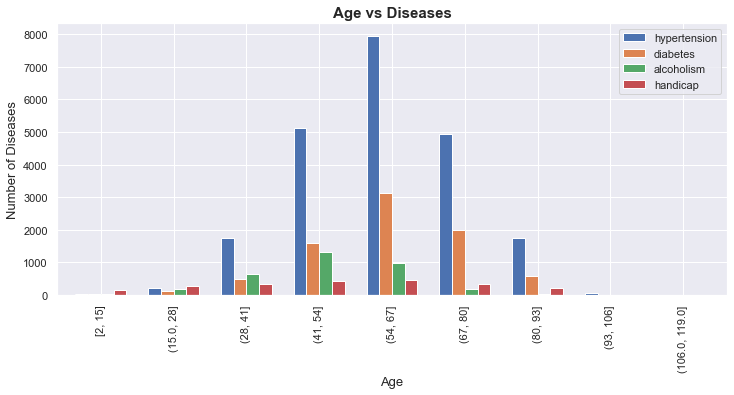

In [167]:
plot_grouped__bar_graph(df_diseases,df_diseases.columns[1:],'Age vs Diseases','Age',
                       'Number of Diseases',[15,13],(12,5))


**We can see that patients of age 55 to 67 have the highest number of Diseases**

### Research Question 8 (What the relation between SMS_received and Show ?)

In [168]:
sms=df_clean.groupby(['SMS_received','Show']).Show.count().unstack()


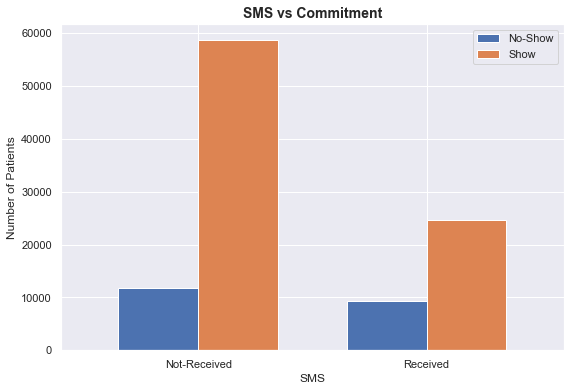

In [170]:
plot_grouped__bar_graph(sms,['No-Show','Show'],'SMS vs Commitment','SMS','Number of Patients',
                       [14,12],(9,6))
plt.xticks(ticks=np.arange(len(sms.index)),labels=['Not-Received','Received'],rotation=0);

**From the graph we can see that no relation between attending the appointment and recieving SMS**

<a id='conclusions'></a>
## Conclusions
> - JARDIM CAMBURI is the Neighbourhood with the highest number of patients going to hospitals in it.
> - Females have more scholarship than males. 
> - Most of patients have Hypertension.
> - Males are more committed to show up to their appointment.
> - patients of age 42 to 54 are more committed to their appointment.
> - patients of age 55 to 67 have more diseases than the other people with high numbers.
> - patients who didn't recieved SMS are more committed than who recieved SMS

### Limitations
> - Number of females are more than number of males 
> - No data much data for people over 90
> - wrong values of age for patients
